In [670]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Content Analysis

This notebook documents the method we applied for systematically examining the free-text data collected across four distinct survey fields. The survey fields included the following questions:

- What do you understand ‘assurance’ to mean in the context of your work? (code: assurance_meaning)
- *For those [Gemini principles] rated very difficult or extremely difficult to operationalize, what are the main challenges you face? (code: operationalization_challenges)
- Would a visual tool that helps you demonstrate and communicate how your evidence-based assurance measures align with key ethical goals enhance trust in your digital twin(s)?
    - If yes, what do you believe are the main benefits? (code: benefits_of_visual_tool)
    - If no, why not? (code: reasons_against_visual_tool)

To identify recurring themes and patterns within these responses, we employed a multi-stage coding strategy involving three independent coders.

The content analysis was carried out as follows:

- Step 1 **Initial Coding** : Two coders independently reviewed and coded each response, applying multiple tags to capture the nuances of the data.
- Step 2 **Code Alignment**: The two coders then discussed individual coding decisions, aiming to reconcile any discrepancies and streamline the codes. This collaborative process resulted in a reduced and harmonized set of codes.
- Step 3 **Validation Coding**: The two coders and an additional third independent coder subsequently applied this refined code set to the data, ensuring an unbiased application of the codes and further validating the consistency of the analysis.
- Step 4 **Compute Inter-coder reliability**
- Step 5 **Code Alignment**

In [671]:
# Load data
df_data = pd.read_excel('tea_dt_data_content.xlsx', sheet_name='AssuranceMeaning')
# Load codes
df_codes = pd.read_excel('tea_dt_data_content.xlsx', sheet_name='Content Codes')

In [672]:
#clean codes
from fuzzywuzzy import process

def find_closest_tag(tag, valid_tags):
    best_match, score = process.extractOne(tag, valid_tags)
    
    if (score < 100) & (score > 0):
        print(f"Replacing '{tag}' with '{best_match}' (Score: {score})")
    
    return best_match

def clean_codes_column(column):
    cleaned_codes = []
    for codes in column:
        if pd.isna(codes):
            cleaned_codes.append(codes)
        else:
            cleaned_codes.append(', '.join([find_closest_tag(tag.strip(), df_codes['Content Code'].unique()) for tag in codes.split(',')]))
    return cleaned_codes

def clean_data(df, column_name):
    df.replace('\xa0', np.nan, inplace=True)
    df = df.dropna(subset=[column_name])
    df.loc[:,'codes_nathan'] = clean_codes_column(df['codes_nathan'])
    df.loc[:,'codes_sophie'] = clean_codes_column(df['codes_sophie'])
    df.loc[:,'codes_chris'] = clean_codes_column(df['codes_chris'])

    return df

df_data = clean_data(df_data, 'assurance_meaning')
df_data.tail()


Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'accessible' with 'accessibility' (Score: 78)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'reproducibility' with 'responsibility' (Score: 76)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'security' with 'privacy/security' (Score: 90)
Replacing 'Reliablity' with 'reliability' (Score: 95)
Replacing 'Explainability' with

Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'bias' with 'assurance as outcome' (Score: 45)
Replacing 'stakeholder invovlement' with 'stakeholder involvement' (Score: 96)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standard' with 'compliance/ standards' (Score: 95)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'intended outcome' with 'intended outcomes of DTs' (Score: 90)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'safety' with 'user trust/confidence' (Score: 45)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'intended outcomes' with 'intended outcomes of DTs' (Score: 95)
Replacing 'explainable/understandable' with 'explainability/unders

Replacing 'intended outcomes of DT' with 'intended outcomes of DTs' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'validation/testing/validation' with 'validation/testing/verification' (Score: 95)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'compliance/standards' with 'compliance/ standards' (Score: 98)
Replacing 'intended outcomes of DT' with 'intended outcomes of DTs' (Score: 98)
Replacing 'intended outcomes of DT' with 'intended outcomes of DTs' (Score: 98)
Replacing 'intended outcomes of DT' with 'intended outcomes of DTs' (Score: 98)


,_id,assurance_meaning,codes_nathan,codes_sophie,codes_chris
44,388c3b87-7882-4cd3-b2b6-2a22d5919518,The capability of the digital twin to ensure accuracy and reliability. We test the digital twins intensively with customers to ensure this.,"accuracy, reliability, validation/testing/verification, stakeholder involvement, assurance as outcome","example of process, accuracy, reliability, stakeholder involvement","accuracy, reliability, validity to real world, validation/testing/verification"
45,0bc58b69-09d6-4843-a8cd-84b9868b84d2,Assurance in my case means the twins accurately and reliably simulates the physical counterpart. This is bounded by context and envelope of intended use.,"accuracy, reliability, validity to real world, pragmatic adequacy, intended outcomes of DTs, assurance as outcome","assurance as outcome, accuracy, reliability, validity to real world, intended outcomes of DTs, pragmatic adequacy","accuracy, reliability, validity to real world, intended outcomes of DTs"
46,f5f66e46-ffe7-4396-a7c9-aa7e44a16fff,Grounds for justified confidence that requirements or claims have been or will be achieved,"pragmatic adequacy, user trust/confidence, intended outcomes of DTs, assurance as outcome","assurance as outcome, intended outcomes of DTs","user trust/confidence, validation/testing/verification"
47,818eb50f-2a88-4821-bc13-0c2fe64b3098,Working with our partners and clients to verify and demonstrate the value created by our technology.,"stakeholder involvement, validation/testing/verification, utility/value, assurance as process","example of process, validation/testing/verification, utility/value","validation/testing/verification, utility/value, stakeholder involvement"
48,fd1545e8-d61b-46c0-a2e0-ae354d83d41c,"For me, it should fundamentally mean gaining informed consent and assuring privacy regarding all related digital twin data for consumers/users. But there are also technological service & application assurance considerations such as data presentation, user interaction, data management, data exchange, marketing and third-party integration etc.","responsibility, privacy/security, data concerns, stakeholder involvement, assurance as process","example of process, privacy/security, example of process, data concerns","privacy/security, user trust/confidence, data concerns"


In [673]:
# Reshape data

# melt researcher columns into one long
df_long = pd.melt(df_data, id_vars=['_id', 'assurance_meaning'], 
                  value_vars=['codes_nathan', 'codes_sophie', 'codes_chris'],
                  var_name='researcher', value_name='codes')

# Split the codes into separate rows
df_long = df_long.assign(codes=df_long['codes'].str.split(',')).explode('codes')
# Trim any extra whitespace
df_long['codes'] = df_long['codes'].str.strip()
# Create a binary column for each code
df_wide = df_long.assign(value=1).pivot_table(index=['_id', 'assurance_meaning', 'researcher'], 
                                              columns='codes', 
                                              values='value', 
                                              fill_value=0)

df_wide = df_wide.reset_index()

In [674]:
df_codes
#paragmatic adequacy - sufficiency

,Question Code,Content Code,Explanation
0,assurance_meaning,assurance as process,Assurance as a process or series of actions or tasks.
1,assurance_meaning,assurance as outcome,"Assurance as what it achieves, rather than what it is."
2,assurance_meaning,example of process,Highlighting specific components of the process.
3,assurance_meaning,user trust/confidence,Emphasizing building or maintaining user trust.
4,assurance_meaning,pragmatic adequacy,Emphasizing degree of outcome in context of use.
5,assurance_meaning,validation/testing/verification,Mention of any process of testing and using test results.
6,assurance_meaning,compliance/ standards,Emphasizing adherence to standards or regulations.
7,assurance_meaning,risk awareness,"Highlighting the identification and mitigation of risks, harms or safety issues."
8,assurance_meaning,intended outcomes of DTs,Verifying that system features align with intended requirements and claims.
9,assurance_meaning,lifecycle,Considerations of the entire lifecycle of the system or process.


In [675]:
# number of unique tags specified in step 2
df_codes[df_codes['Question Code']=='assurance_meaning']

,Question Code,Content Code,Explanation
0,assurance_meaning,assurance as process,Assurance as a process or series of actions or tasks.
1,assurance_meaning,assurance as outcome,"Assurance as what it achieves, rather than what it is."
2,assurance_meaning,example of process,Highlighting specific components of the process.
3,assurance_meaning,user trust/confidence,Emphasizing building or maintaining user trust.
4,assurance_meaning,pragmatic adequacy,Emphasizing degree of outcome in context of use.
5,assurance_meaning,validation/testing/verification,Mention of any process of testing and using test results.
6,assurance_meaning,compliance/ standards,Emphasizing adherence to standards or regulations.
7,assurance_meaning,risk awareness,"Highlighting the identification and mitigation of risks, harms or safety issues."
8,assurance_meaning,intended outcomes of DTs,Verifying that system features align with intended requirements and claims.
9,assurance_meaning,lifecycle,Considerations of the entire lifecycle of the system or process.


In [676]:
# extract question specific codes
assurance_meaning_codes = df_codes[df_codes['Question Code']=='assurance_meaning']['Content Code'].unique()
assurance_meaning_codes = [code.strip() for code in assurance_meaning_codes]
assurance_meaning_codes

['assurance as process',
 'assurance as outcome',
 'example of process',
 'user trust/confidence',
 'pragmatic adequacy',
 'validation/testing/verification',
 'compliance/ standards',
 'risk awareness',
 'intended outcomes of DTs',
 'lifecycle',
 'objectivity',
 'stakeholder involvement',
 'validity to real world',
 'unsure',
 'data concerns',
 'reliability',
 'accuracy',
 'privacy/security',
 'utility/value',
 'explainability/understandable',
 'interoperability',
 'responsibility',
 'transparency',
 'accessibility']

## Analyse Coding Data

In [677]:
def has_differences(row):
    # Check if there is any column in the row that has a sum 1 or 2
    return row.isin([1, 2]).any()

df_grouped = df_wide.groupby(['assurance_meaning']).sum(numeric_only=True)
df_grouped['has_difference'] = df_grouped.apply(has_differences, axis=1)

print(f'{df_grouped['has_difference'].sum()} differences detected')


44 differences detected


In [678]:
# Identify & note diverging codes (columns with 1 or 2)
def diverge_codes1(row):
    diverging = row[row.isin([1, 2])].index.tolist() 
    return diverging 
df_grouped['diverging_codes'] = df_grouped[assurance_meaning_codes].apply(diverge_codes1, axis=1)

In [679]:
# Count how often each tag occured as divergent


all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]

code_counts = Counter(all_diverging_codes)
code_counts.most_common()


[('assurance as outcome', 36),
 ('assurance as process', 15),
 ('intended outcomes of DTs', 14),
 ('example of process', 12),
 ('validation/testing/verification', 9),
 ('stakeholder involvement', 9),
 ('pragmatic adequacy', 7),
 ('risk awareness', 7),
 ('utility/value', 7),
 ('responsibility', 7),
 ('accuracy', 6),
 ('privacy/security', 5),
 ('validity to real world', 5),
 ('user trust/confidence', 5),
 ('data concerns', 4),
 ('transparency', 4),
 ('compliance/ standards', 3),
 ('objectivity', 2),
 ('explainability/understandable', 2),
 ('accessibility', 2),
 ('lifecycle', 2),
 ('reliability', 1)]

Text(0, 0.5, 'Frequency across all responses')

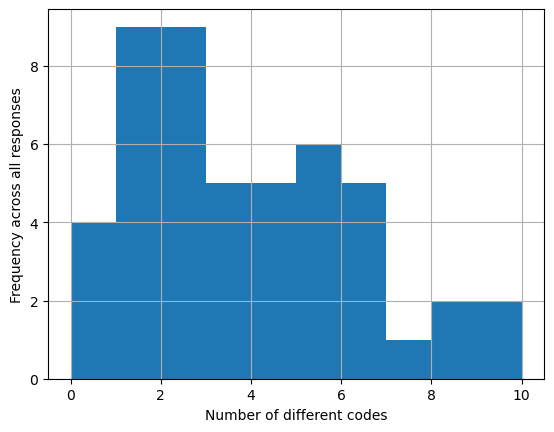

In [680]:
df_grouped['difference_count'] = df_grouped['diverging_codes'].apply(len)
df_grouped['difference_count'].hist()
plt.xlabel('Number of different codes')
plt.ylabel('Frequency across all responses')

In [681]:
# code counts per response ordered from most differences to least differences
df_grouped = df_grouped.sort_values(by='difference_count', ascending=False)


In [682]:
## Map extracted difference onto original data frame (which contains individual researcher coding)
df_wide['diverging_codes'] = df_wide['assurance_meaning'].map(df_grouped['diverging_codes'])
df_wide.head()

codes,_id,assurance_meaning,researcher,accessibility,accuracy,assurance as outcome,assurance as process,compliance/ standards,data concerns,example of process,explainability/understandable,intended outcomes of DTs,interoperability,lifecycle,objectivity,pragmatic adequacy,privacy/security,reliability,responsibility,risk awareness,stakeholder involvement,transparency,unsure,user trust/confidence,utility/value,validation/testing/verification,validity to real world,diverging_codes
0,060e5599-7345-489e-8500-66c4cbd083a5,Reproducibility and accuracy of the DT,codes_chris,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[validation/testing/verification, responsibility]"
1,060e5599-7345-489e-8500-66c4cbd083a5,Reproducibility and accuracy of the DT,codes_nathan,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[validation/testing/verification, responsibility]"
2,060e5599-7345-489e-8500-66c4cbd083a5,Reproducibility and accuracy of the DT,codes_sophie,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[validation/testing/verification, responsibility]"
3,0bc58b69-09d6-4843-a8cd-84b9868b84d2,Assurance in my case means the twins accurately and reliably simulates the physical counterpart. This is bounded by context and envelope of intended use.,codes_chris,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[assurance as outcome, pragmatic adequacy]"
4,0bc58b69-09d6-4843-a8cd-84b9868b84d2,Assurance in my case means the twins accurately and reliably simulates the physical counterpart. This is bounded by context and envelope of intended use.,codes_nathan,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[assurance as outcome, pragmatic adequacy]"


## **Step 3** Discussion to align on final codes

In [683]:
df_wide.columns

Index(['_id', 'assurance_meaning', 'researcher', 'accessibility', 'accuracy',
       'assurance as outcome', 'assurance as process', 'compliance/ standards',
       'data concerns', 'example of process', 'explainability/understandable',
       'intended outcomes of DTs', 'interoperability', 'lifecycle',
       'objectivity', 'pragmatic adequacy', 'privacy/security', 'reliability',
       'responsibility', 'risk awareness', 'stakeholder involvement',
       'transparency', 'unsure', 'user trust/confidence', 'utility/value',
       'validation/testing/verification', 'validity to real world',
       'diverging_codes'],
      dtype='object', name='codes')

In [684]:
## use this cell to implement any changes to align on codes (and keep track of changes)
## e.g. 
df_new = df_wide.copy() 
# Adjust the value in the specific cell
df_new.loc[(df_new['_id'] == '0bc58b69-09d6-4843-a8cd-84b9868b84d2') & 
           (df_new['researcher'] == 'codes_sophie'), 'accuracy'] = 0
df_new.loc[(df_new['_id'] == '2ea39c17-6391-4057-b8c4-b375daa00917') & 
           (df_new['researcher'] == 'codes_sophie'), 'integrity'] = 0
df_new.loc[(df_new['_id'] == '2ea39c17-6391-4057-b8c4-b375daa00917') & 
           (df_new['researcher'] == 'codes_nathan'), 'integrity'] = 0
df_new.loc[(df_new['_id'] == '2ea39c17-6391-4057-b8c4-b375daa00917') & 
           (df_new['researcher'] == 'codes_chris'), 'integrity'] = 0



In [685]:
#expand display so we can review all dteails
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


## Notes on joint discussion with all 3 coders:

- Drop 'assurance as outcome' as a code
- Merge 'assurance as process' & 'example of process' into **process** =  explicit mention of 'process', or 'activities' that are part of a process, attributes of a process
- Merge 'intended outcomes of DTs' and 'validation/testing/verification' into **verification/validation/testing = includes 'checking generalisability' and any reference to meeting requirements.

## Nathan & Sophie alignment

In [686]:
df_wide = df_wide[df_wide['researcher']!='codes_chris']
df_grouped = df_wide.groupby(['assurance_meaning']).sum(numeric_only=True)

In [687]:
def diverge_codes2(row):
    diverging = row[row.isin([1])].index.tolist() 
    return diverging 
df_grouped['diverging_codes'] = df_grouped[assurance_meaning_codes].apply(diverge_codes2, axis=1)
all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]

code_counts = Counter(all_diverging_codes)
code_counts.most_common()

[('assurance as outcome', 23),
 ('example of process', 10),
 ('intended outcomes of DTs', 9),
 ('assurance as process', 7),
 ('responsibility', 7),
 ('risk awareness', 6),
 ('validation/testing/verification', 5),
 ('stakeholder involvement', 5),
 ('accuracy', 4),
 ('privacy/security', 3),
 ('data concerns', 3),
 ('utility/value', 3),
 ('validity to real world', 3),
 ('pragmatic adequacy', 3),
 ('compliance/ standards', 3),
 ('user trust/confidence', 2),
 ('transparency', 2),
 ('objectivity', 1),
 ('accessibility', 1),
 ('lifecycle', 1),
 ('explainability/understandable', 1)]

In [688]:
code_of_interest = 'explainability/understandable'  # Replace with the specific code you're interested in
df_wide['diverging_codes'] = df_wide['assurance_meaning'].map(df_grouped['diverging_codes'])
df_wide[df_wide['diverging_codes'].apply(lambda codes: code_of_interest in codes)][['assurance_meaning','researcher','explainability/understandable']]

codes,assurance_meaning,researcher,explainability/understandable
109,"To provide security about a certain topic like fairness, explainability, etc.",codes_nathan,1.0
110,"To provide security about a certain topic like fairness, explainability, etc.",codes_sophie,0.0


## Notes 2 coders: assurance meaning
- general rule: tags are independent. If there is a more specific code for something, don't also select a more general one to catpure the same aspect of the response.
- new code: integrity (outlier code)
- assurance as process - explicit mention of the word 'process' or attributes that correspond to a process
- compliance/standards - some form of approval at final stage before deployment  
- responsibility - beyond explicit mention, includes any response incorporating ethics
- risk awareness - somewhat technical definition of risk, safety risk
- stakeholder engagement - explicit mention of 'stakeholder(s)' or specific mention of any users and decision makers influencing the digital twin.
- Pragmatic adequacy = any response applying cautious/protective language to limit or qualify the scope of the assurance.

Additional observations:
- discussion point on how some responses are more detailed and 'definition-like' comapred to others more intuitive or anecdotal
- codes are hard to find, that's because community is not aligned on their understanding on assurance


In [689]:
df_data = pd.read_excel('tea_dt_data_content.xlsx', sheet_name='OperationalisationChallenges')
df_data = clean_data(df_data, 'operationalization_challenges')

Replacing 'lack of community concensus' with 'lack of community consensus' (Score: 96)
Replacing 'explaining value' with 'explaining/communicating value' (Score: 86)
Replacing 'how to assure DT' with 'how to assure DTs' (Score: 97)
Replacing 'lack of community' with 'lack of community consensus' (Score: 90)
Replacing 'appropriate people involved/lack of expertise consensus' with 'appropriate people involved/lack of expertise' (Score: 95)


In [690]:
df_data.tail()

,_id,operationalization_challenges,codes_nathan,codes_sophie,codes_chris
44,388c3b87-7882-4cd3-b2b6-2a22d5919518,Technology limitations. company policies,"technology changes, changing/adding to organisational processes","technology changes, changing/adding to organisational processes",changing/adding to organisational processes
45,0bc58b69-09d6-4843-a8cd-84b9868b84d2,"Design for automation, design for scale.",data concerns,contextual/sector-specific concerns,NaN
46,f5f66e46-ffe7-4396-a7c9-aa7e44a16fff,"Being able to communicate the value to their end customers. For us as assurers, it is hard to show what value our customers will get from assurance as the main beneficiary may be our customers' customers",explaining/communicating value,explaining/communicating value,explaining/communicating value
47,818eb50f-2a88-4821-bc13-0c2fe64b3098,Stakeholder engagement,appropriate people involved/lack of expertise,appropriate people involved/lack of expertise,appropriate people involved/lack of expertise
48,fd1545e8-d61b-46c0-a2e0-ae354d83d41c,Consistency and consensus within a specific sector is our main challenge.,"consistency, contextual/sector-specific concerns","consistency, lack of community consensus",consistency


In [691]:
df_long = pd.melt(df_data, id_vars=['_id', 'operationalization_challenges'], 
                  value_vars=['codes_nathan', 'codes_sophie', 'codes_chris'],
                  var_name='researcher', value_name='codes')

# Split the codes into separate rows
df_long = df_long.assign(codes=df_long['codes'].str.split(',')).explode('codes')
# Trim any extra whitespace
df_long['codes'] = df_long['codes'].str.strip()
# Create a binary column for each code
df_wide = df_long.assign(value=1).pivot_table(index=['_id', 'operationalization_challenges', 'researcher'], 
                                              columns='codes', 
                                              values='value', 
                                              fill_value=0)

df_wide = df_wide.reset_index()

In [692]:
# Reduce to 2 coders first
df_wide = df_wide[df_wide['researcher']!='codes_chris']

In [693]:
op_codes = df_codes[df_codes['Question Code']=='operationalization_challenges']['Content Code'].unique()
op_codes = [code.strip() for code in op_codes]
op_codes

['data concerns',
 'technology changes',
 'consistency',
 'appropriate people involved/lack of expertise',
 'balancing openness vs privacy',
 'short-term vs long-term interests',
 'explaining/communicating value',
 'lack of community consensus',
 'contextual/sector-specific concerns',
 'lack of time/budget',
 'changing/adding to organisational processes',
 'how to assure DTs',
 'lack of definitions']

In [694]:
df_grouped = df_wide.groupby(['operationalization_challenges']).sum(numeric_only=True)
df_grouped['has_difference'] = df_grouped.apply(has_differences, axis=1)

df_grouped['diverging_codes'] = df_grouped[op_codes].apply(diverge_codes2, axis=1)
all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]

code_counts = Counter(all_diverging_codes)
code_counts.most_common()

[('balancing openness vs privacy', 6),
 ('explaining/communicating value', 6),
 ('lack of community consensus', 5),
 ('lack of definitions', 5),
 ('contextual/sector-specific concerns', 5),
 ('consistency', 4),
 ('appropriate people involved/lack of expertise', 4),
 ('how to assure DTs', 4),
 ('lack of time/budget', 3),
 ('technology changes', 2),
 ('data concerns', 2),
 ('changing/adding to organisational processes', 1)]

In [695]:
# Get overall # assignment per tag
result = df_grouped.groupby('operationalization_challenges').sum()
binary_result = result[op_codes].applymap(lambda x: 1 if x > 0 else 0)
binary_result.sum().sort_values(ascending=False)

/var/folders/pf/qtjbydz94vv7r4pq8q1wxq980000gr/T/ipykernel_67175/1790969193.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_result = result[op_codes].applymap(lambda x: 1 if x > 0 else 0)


codes
explaining/communicating value                   13
lack of community consensus                      10
data concerns                                     9
contextual/sector-specific concerns               9
lack of definitions                               9
how to assure DTs                                 8
consistency                                       7
appropriate people involved/lack of expertise     7
balancing openness vs privacy                     7
technology changes                                4
lack of time/budget                               4
changing/adding to organisational processes       4
short-term vs long-term interests                 3
dtype: int64

In [696]:
code_of_interest = 'changing/adding to organisational processes'  # Replace with the specific code you're interested in
df_wide['diverging_codes'] = df_wide['operationalization_challenges'].map(df_grouped['diverging_codes'])
df_wide[df_wide['diverging_codes'].apply(lambda codes: code_of_interest in codes)][['_id','operationalization_challenges','researcher','changing/adding to organisational processes','appropriate people involved/lack of expertise']]

codes,_id,operationalization_challenges,researcher,changing/adding to organisational processes,appropriate people involved/lack of expertise
69,a6f19f94-0db1-4893-8c76-06a63db3a753,Human Resources: Adequate competent staffing required to deliver these capabilities.,codes_nathan,1.0,1.0
70,a6f19f94-0db1-4893-8c76-06a63db3a753,Human Resources: Adequate competent staffing required to deliver these capabilities.,codes_sophie,0.0,1.0


### Notes 2 coders: operationalizing challenges

- balancing openess vs privacy: responses that indicate a willingness or importance towards openness/sharing but identify limitations & trade-offs due to privacy concerns.
- explaining/communicating value: this could refer to value of the digital twin or value of the process of assuring certain properties, generally responses touching on lack of mutual understanding.
- How to assure DTs: responses reporting to be unsure where to begin or lack of knowledge needed.
- merging consistency & lack of community consensus into "Lack of consistency (eg within community, application, definition of terms)"
- new code: invalid
- contextual/sector-specific concerns: catch-all tag for when a response mentions a sector-specific challenge that is not captured by other tags
- appropriate people involved/lack of expertise: specifically lack of experienced people to implement assurance, NOT general unfamiliarity with assurance 

## Notes 3 coders: aligning on final codes

In [697]:
# Load & Clean
# AssuranceMeaning_2, OperationalisationChallenge_2, BenefitsTool, AgainstTool
sheet_select = 'OperationalisationChallenge_2'
field_name = 'operationalization_challenges'

df_data = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name=sheet_select)
df_codes = pd.read_excel('tea_dt_data_content2.xlsx', sheet_name='Content Codes_2')
df_codes = df_codes.iloc[1:,:]

codes_select = df_codes[df_codes['Question Code']==field_name]['Content Code'].unique()
codes_select = [code.strip() for code in codes_select]

df_data = clean_data(df_data, field_name)

Replacing 'data  concerns' with 'data concerns' (Score: 96)


In [698]:
#Load data on challenge ratings
df_challenge = pd.read_csv('tea_dt_data_full.csv')
df_challenge = df_challenge.loc[:, ['_id'] + [col for col in df_challenge.columns if col.startswith('challenge_')]]
df_challenge.set_index('_id', inplace=True)
#df_challenge.head()

In [699]:
# Reshape
df_long = pd.melt(df_data, id_vars=['_id', field_name], 
                  value_vars=['codes_nathan', 'codes_sophie', 'codes_chris'],
                  var_name='researcher', value_name='codes')

# Split the codes into separate rows
df_long = df_long.assign(codes=df_long['codes'].str.split(',')).explode('codes')
# Trim any extra whitespace
df_long['codes'] = df_long['codes'].str.strip()
# Create a binary column for each code
df_wide = df_long.assign(value=1).pivot_table(index=['_id', field_name, 'researcher'], 
                                              columns='codes', 
                                              values='value', 
                                              fill_value=0)

df_wide = df_wide.reset_index()
df_wide = df_wide[df_wide['researcher']!='codes_chris']

In [700]:
def has_consensus(row):
    # Check if there is any column in the row that has a sum 1 or 2
    return row.isin([2]).any()

df_grouped = df_wide.groupby([field_name]).sum(numeric_only=True)
df_grouped['has_consensus'] = df_grouped.apply(has_consensus, axis=1)

print(f'{df_grouped['has_consensus'].sum()} responses with consensus detected')


39 responses with consensus detected


In [701]:
(df_grouped == 2.0).sum()

codes
Lack of consistency                              11
appropriate people involved/lack of expertise     5
balancing openness vs privacy                     4
changing/adding to organisational processes       2
contextual/sector-specific concerns               3
data concerns                                     6
explaining/communicating value                    8
how to assure DTs                                 7
integrity                                         0
invalid                                           1
lack of time/budget                               3
short-term vs long-term interests                 2
stakeholder involvement                           0
technology changes                                1
has_consensus                                     0
dtype: int64

In [702]:
# how often was each tag assigned (by anyone) overall
result = df_grouped.groupby(field_name).sum()
binary_result = result[codes_select].applymap(lambda x: 1 if x > 0 else 0)
binary_result.sum().sort_values(ascending=False)

/var/folders/pf/qtjbydz94vv7r4pq8q1wxq980000gr/T/ipykernel_67175/1410547839.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  binary_result = result[codes_select].applymap(lambda x: 1 if x > 0 else 0)


codes
Lack of consistency                              14
explaining/communicating value                   13
data concerns                                    10
how to assure DTs                                 8
balancing openness vs privacy                     7
appropriate people involved/lack of expertise     6
contextual/sector-specific concerns               6
short-term vs long-term interests                 4
lack of time/budget                               3
changing/adding to organisational processes       3
technology changes                                2
invalid                                           1
dtype: int64

In [709]:
df_grouped['diverging_codes'] = df_grouped[codes_select].apply(diverge_codes2, axis=1)
all_diverging_codes = [code for sublist in df_grouped['diverging_codes'] for code in sublist]

code_counts = Counter(all_diverging_codes)
code_counts.most_common()

[('explaining/communicating value', 5),
 ('data concerns', 4),
 ('contextual/sector-specific concerns', 3),
 ('Lack of consistency', 3),
 ('balancing openness vs privacy', 3),
 ('short-term vs long-term interests', 2),
 ('appropriate people involved/lack of expertise', 1),
 ('changing/adding to organisational processes', 1),
 ('how to assure DTs', 1),
 ('technology changes', 1)]

In [713]:
code_of_interest = 'explaining/communicating value'  # Replace with the specific code you're interested in
df_wide['diverging_codes'] = df_wide[field_name].map(df_grouped['diverging_codes'])
df_wide[df_wide['diverging_codes'].apply(lambda codes: code_of_interest in codes)][[field_name,'researcher',code_of_interest,'diverging_codes']]

codes,operationalization_challenges,researcher,explaining/communicating value
42,"Defining valuable use cases, evaluating impact and kpis, protection of secure data with limited budget, lack of standards and frameworks for data exchange among physical digital twins, lack of semantic interoperability among digital twins for cities, heterogeneity of roles in public sector and lack of ownership due to constant political changes",codes_nathan,0.0
43,"Defining valuable use cases, evaluating impact and kpis, protection of secure data with limited budget, lack of standards and frameworks for data exchange among physical digital twins, lack of semantic interoperability among digital twins for cities, heterogeneity of roles in public sector and lack of ownership due to constant political changes",codes_sophie,1.0
51,time and budget to implement fully and to understand consquential impact of using or sharing insights,codes_nathan,0.0
52,time and budget to implement fully and to understand consquential impact of using or sharing insights,codes_sophie,1.0
54,Natural systems are much more complex and chaotic than traditional DT systems and typically not directly manageable or immediately responsive to intervention (which is one of the fundamental assumptions of DTs that the system can bee influenced by feedback loops) so actually understanding what can be managed and the most justifiable/effective way to apply the DT paradigm to natural systems is complex and also less financially rewarding in the short term.,codes_nathan,0.0
55,Natural systems are much more complex and chaotic than traditional DT systems and typically not directly manageable or immediately responsive to intervention (which is one of the fundamental assumptions of DTs that the system can bee influenced by feedback loops) so actually understanding what can be managed and the most justifiable/effective way to apply the DT paradigm to natural systems is complex and also less financially rewarding in the short term.,codes_sophie,1.0
75,The main difficulty is the coordination/education of the development team.,codes_nathan,1.0
76,The main difficulty is the coordination/education of the development team.,codes_sophie,0.0
110,"Lack of definition of what constitutes public value; lack of agreement over what value creation is needed (when there is a range of stakeholders in the room)\nConcerns around managing security and openness; Challenges around gathering data from varied sources, making it interoperable and assuring its quality; \nStandards and interfaces for federation\nImmaturity of the sector wrt curation - also the long timescales of data required for built environment management (where physical assets persist for >>100 years)\nEvolution - what does it mean, how do we do it?",codes_nathan,1.0
111,"Lack of definition of what constitutes public value; lack of agreement over what value creation is needed (when there is a range of stakeholders in the room)\nConcerns around managing security and openness; Challenges around gathering data from varied sources, making it interoperable and assuring its quality; \nStandards and interfaces for federation\nImmaturity of the sector wrt curation - also the long timescales of data required for built environment management (where physical assets persist for >>100 years)\nEvolution - what does it mean, how do we do it?",codes_sophie,0.0


## Notes

In [ ]:
indices = binary_result[binary_result['how to assure DTs']==1].index
matching_ids = df_data[df_data[field_name].isin(indices)]['_id']
filtered_df = df_challenge.loc[matching_ids]

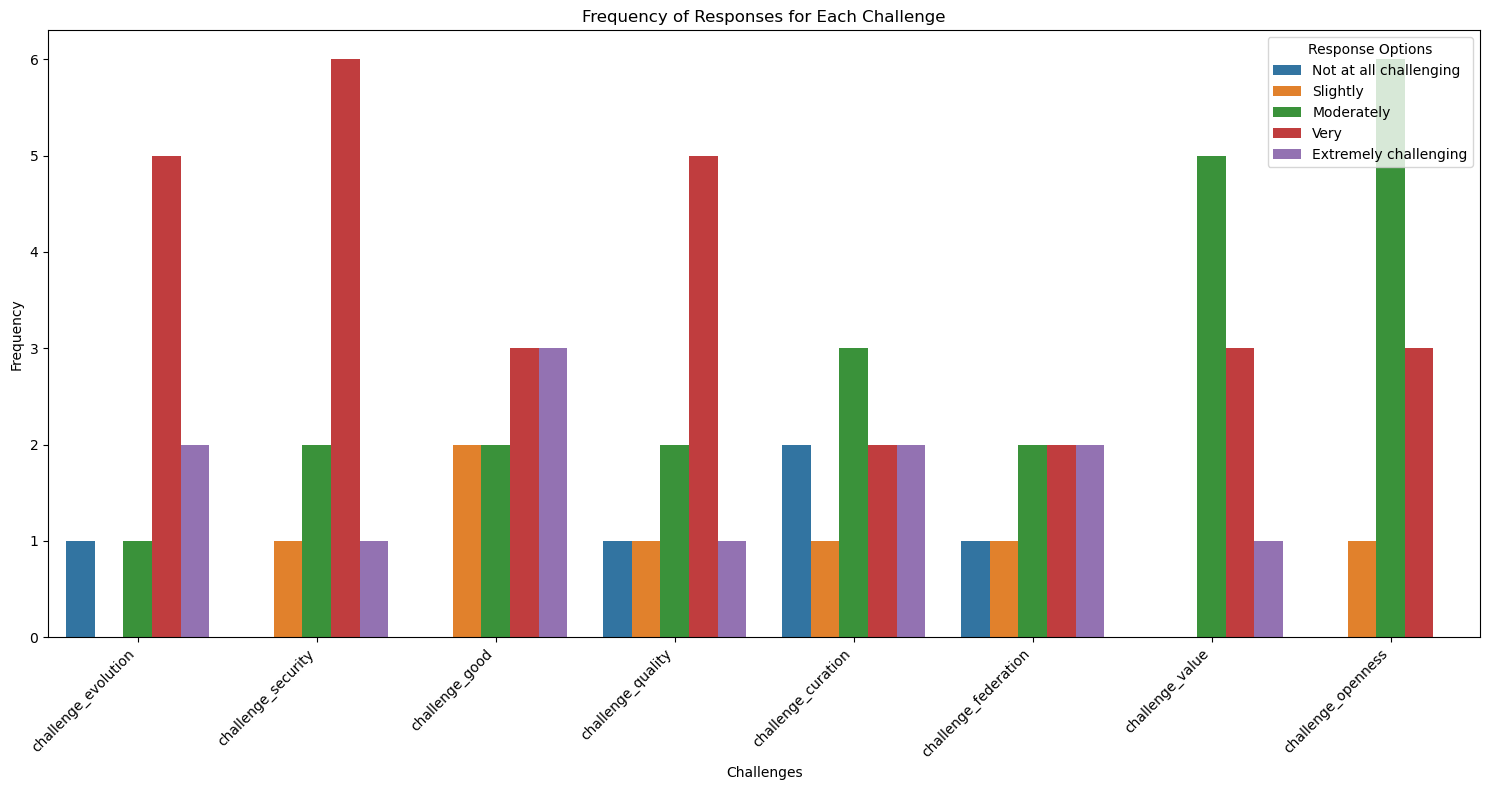

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered_df' is your filtered DataFrame
challenge_columns = [col for col in filtered_df.columns if col.startswith('challenge_')]

# Melt the DataFrame to long format for seaborn
melted_df = filtered_df[challenge_columns].melt(var_name='Challenge', value_name='Response')

# Define the order of response labels
response_labels = ["Not at all challenging", "Slightly", "Moderately", "Very", "Extremely challenging"]

# Calculate the total frequency of "Very" and "Extremely challenging" responses
challenge_order = (melted_df[melted_df['Response'].isin(["Very", "Extremely challenging"])]
                   .groupby('Challenge')
                   .size()
                   .sort_values(ascending=False)
                   .index)

# Create the grouped bar plot with sorted challenges
plt.figure(figsize=(15, 8))
sns.countplot(data=melted_df, x='Challenge', hue='Response', order=challenge_order, hue_order=response_labels)

# Customizing the plot
plt.xlabel('Challenges')
plt.ylabel('Frequency')
plt.title('Frequency of Responses for Each Challenge')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Response Options')
plt.tight_layout()

# Show the plot
plt.show()
